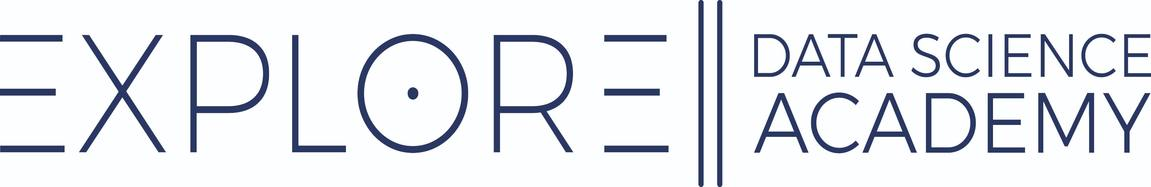


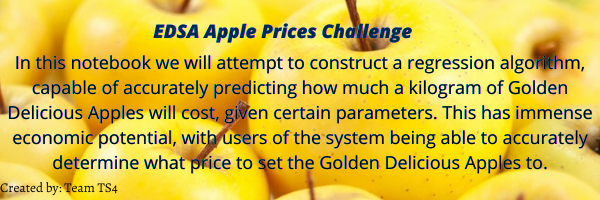

### Introduction

EDSA has provided a challege to construct regression capable of accurately predicting how much a kilogram of golden delicious apples will cost given certain parameters. For this particular challenge, we will focus on supervised machine learning, which in general terms is described as the process where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output. Supervised learning is seperated into two types of problems, classication and regression. Our focus will be on the latter problem as described in the problem statement of the challenge.

##### Visual representation of supervised machine learning.

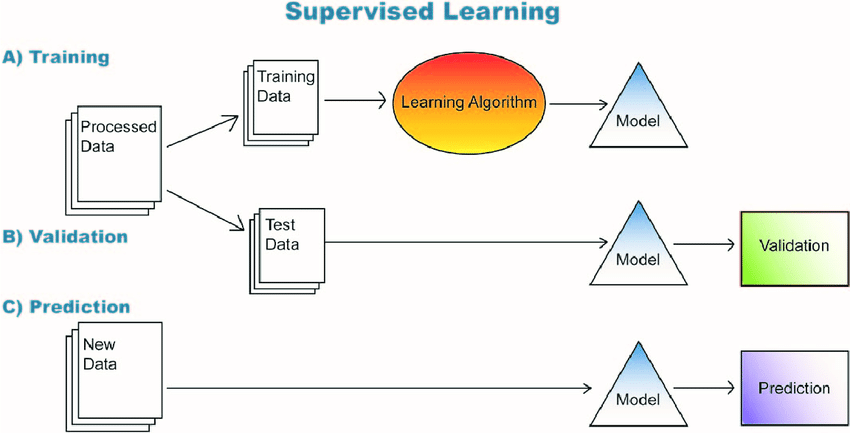



The challenge will follow the five phases of the data science process, which include data collection, cleaning, exploratory data analysis, model building and model deployment.



### Data Collection

The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs.
The data supplied includes:
sample_submission.csv - Sample of the submission format for the hackathon.
df - test_set.csv - The test split of the dataset.
df - train_set.csv - The training split of the dataset.

# Phase 2: Data Cleaning

We will start by first importing some of the packages we will need to clean and explore our data. This is not an exclusive list of all the packages. Should we need more packages in the process we will import them at a later stage as needed.

In [1]:
###pip install xgboost

In [2]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


#from sklearn import preprocessing # provides functions and classes to change raw feature vectors
#from scipy import stats

#from math import log




 
#from math import sqrt



In [3]:
 # import the train data for exploration
df_train = pd.read_csv('Advanced_regression_predict-Starter-Data-2629/df-train_set.csv')

In [4]:
df_train.head()# explore the data

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
df_train.info() # lets have a look at our columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [6]:
df_train.isnull().sum() #sum up all the null values in the columns

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The first step in our datacleaning process is to check for null values and decide how to deal with them. As we can see the table has 13 columns, all the columns have 0 nulls which tells us that we dont have any null values to deal with. 
If we have a look at the data types, we can already tell that most of the data types are appropriate for the columns, The only data type that we could change would be the date column, should we need the date column in our data analysis or model building phase it would be easier to deal with it as a datetime datatype rather than an object.

In [7]:
df_train['Date'] = pd.to_datetime(df_train['Date']) # change the date column from string datatype
                                                    # to datetime datatype

In [8]:
df_train.info() # lets confirm our changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64376 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 6.4+ MB


# Phase 3: Exploratory Data Analysis

## Univariate Analysis

We will start by analysing each feature on its own to see what insights we can gain from them. As we can see, we have 5 categorical data types and 8 numerical datatypes. We will analyse the numerical data types using descriptive statistics.

##### 5 Number summary

Lets start with the 5 number summary - maximum, 3rd quartile mean, 1st quartile and minimum.We will also look at our standard deviation and the count of our data points in each column.

The five-number summary provides a concise summary of the distribution of the observations.The five-number summary gives information about the location, spread and range of the observations.

In [9]:
#filter for our commodity of interest: APPLE GOLDEN DELICIOUS
new_df_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
new_df_train.describe()# calculate our 5 number summary as well as standard deviation

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Lets represent this table as a visual using box plots, which show us a visual of where our 5 number summary is located in our dataset and more importantly where we have outliers that might skew our data.

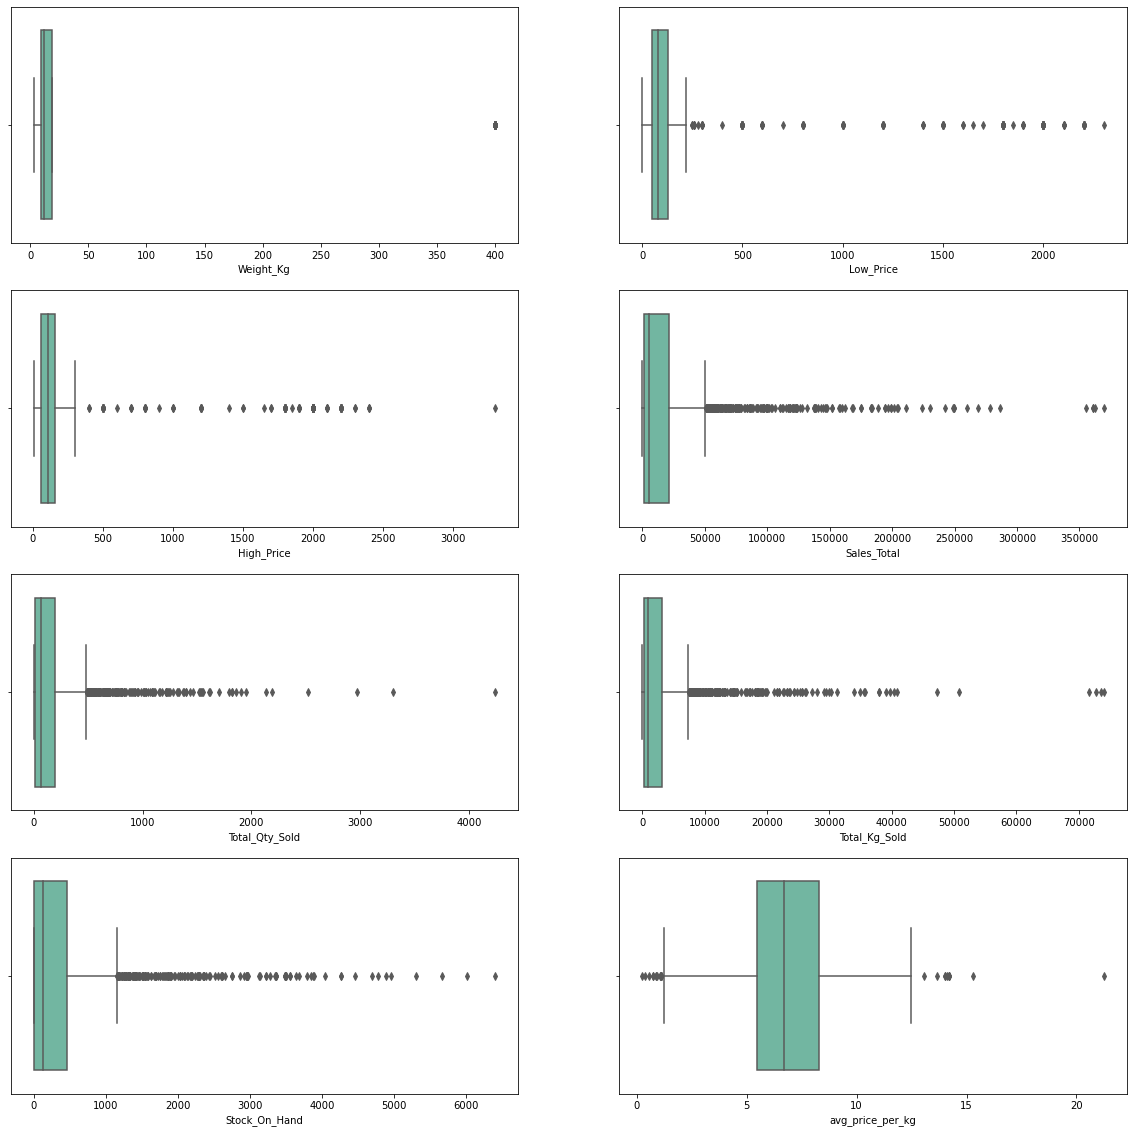

In [10]:
fig, ax = plt.subplots(4,2, figsize=(20,20))

sns.boxplot(x = 'Weight_Kg', data=new_df_train, orient="h",palette="Set2", ax=ax[0,0])
sns.boxplot(x = 'Low_Price', data=new_df_train, orient="h", palette="Set2", ax=ax[0,1])
sns.boxplot(x = 'High_Price', data=new_df_train, orient="h", palette="Set2", ax=ax[1,0])
sns.boxplot(x = 'Sales_Total', data=new_df_train, orient="h", palette="Set2", ax=ax[1,1])
sns.boxplot(x = 'Total_Qty_Sold', data=new_df_train, orient="h", palette="Set2", ax=ax[2,0])
sns.boxplot(x = 'Total_Kg_Sold', data=new_df_train, orient="h", palette="Set2", ax=ax[2,1])
sns.boxplot(x = 'Stock_On_Hand', data=new_df_train, orient="h", palette="Set2", ax=ax[3,0])
sns.boxplot(x = 'avg_price_per_kg', data=new_df_train, orient="h", palette="Set2", ax=ax[3,1])

plt.show()

From the box plots above we can see where most of our data lies and we can clearly see where our outliers are and can filter them out to get a better idea of our dataset. As we can see:

     1. With Weight per kg, most of the data points lie at below 20kg except for 1 outlier at about 400kg.
     2. With Sales Total, most of the data points lie at below R50 000 except for a few ouliers going up to about R350 000.
     3. With avg price per kg, most of the data points lie at below R15 except for a few ouliers going up to about R20.
     4. With Stock on hand, most of the data points lie at below 1300 items except for a few ouliers going up to about 6000.
     5. With Total Qty Sold, most of the data points lie at below 1300 items except for a few ouliers going up to about 4000
     6. With Total KG Sold, most of the data points lie at below 10000KG except for a few ouliers going up to about 70 000KG
     
     
Lets confirm all of this by calculating the skewness and kurtosis of our dataset.


##### skewness and kurtosis

Lets now look at the skewness of our data. Skewness is a measure of the symmetry of a distribution. A distribution is skewed if the tail on one side of the mode of the data is fatter or longer than on the other, it is asymmetrical.
In an asymmetrical distribution a negative skew indicates that the tail on the left side is longer than on the right side (left-skewed), conversely a positive skew indicates the tail on the right side is longer than on the left (right-skewed). Asymmetric distributions occur when extreme values lead to a distortion of the normal distribution.

In [11]:
new_df_train.skew() # represent our skew

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

Lets visually represent this skewness.

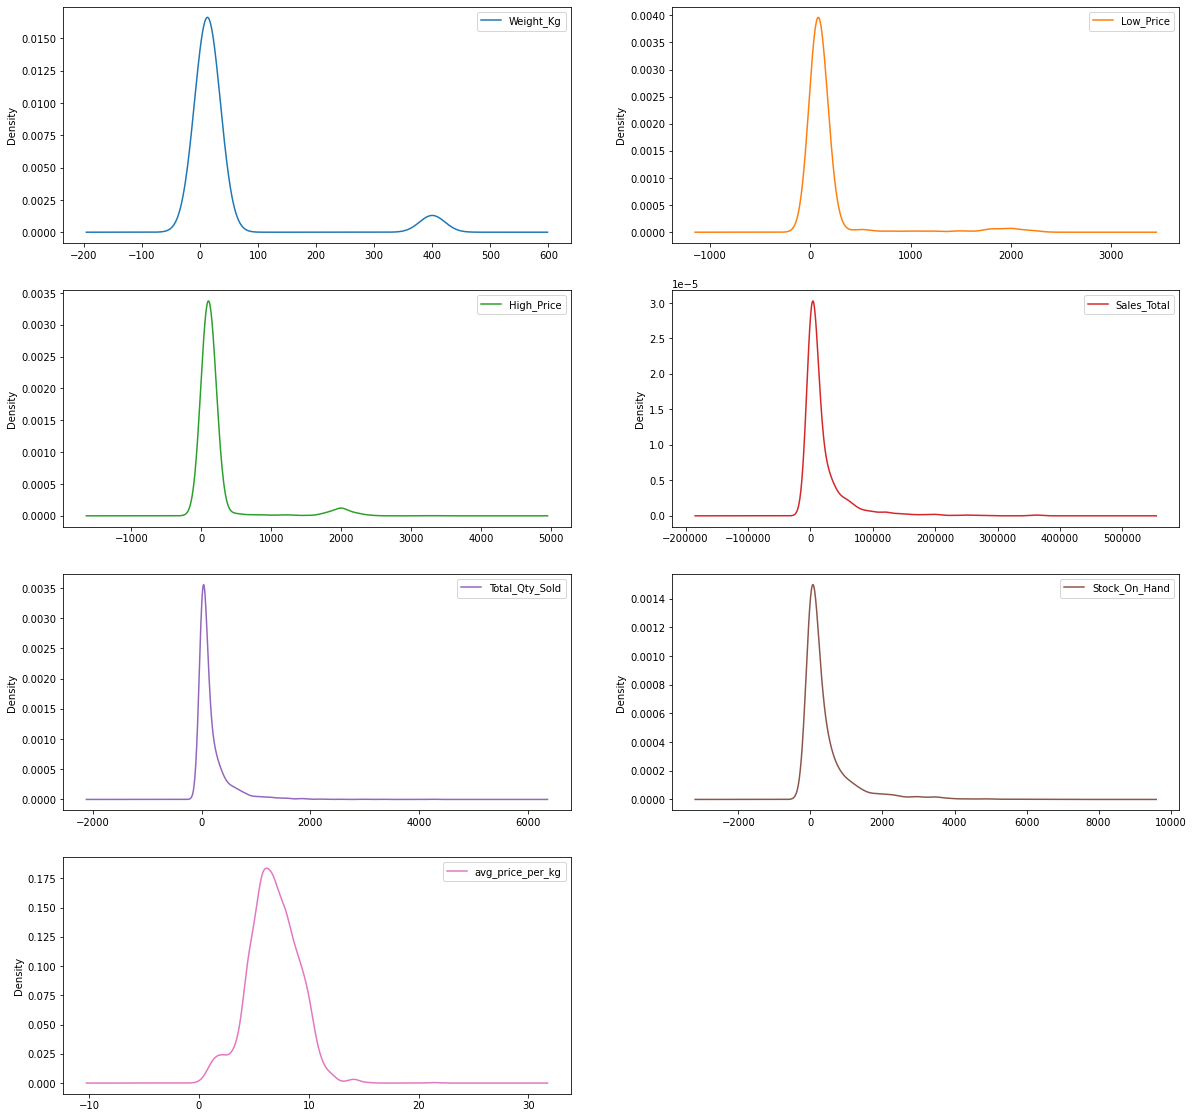

In [12]:
columns = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand','avg_price_per_kg' ] # create a list of all numerical columns
new_df_train[columns].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(20, 20));

With all of our variables, the the tail on the right side is longer than on the left meaning that our data is **right skewed**.

In [13]:
new_df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

This indicates that most of our data has High kurtosis which indicates a large number of outliers exist in our data.However, we can see that our avrage price per kg is fairly symmetrical with only a few outiers and a low kutosis whis is to be expected because the avg_price_per_kg column is a calculated column that has been averaged and calculated per kg.

Good, so now that we have confirmed that our data definately has outliers, we will replace them with the median of the column without the outlier to get a better representation of our data????????

In [14]:
#new_df_train["Weight_Kg"] = np.where(new_df_train["Weight_Kg"] >50, new_df_train["Weight_Kg"].median(),new_df_train['Weight_Kg'])
#new_df_train["Sales_Total"] = np.where(new_df_train["Sales_Total"] >50000, new_df_train["Sales_Total"].median(),new_df_train['Sales_Total'])
#new_df_train["avg_price_per_kg"] = np.where(new_df_train["avg_price_per_kg"] >15, new_df_train["avg_price_per_kg"].median(),new_df_train['avg_price_per_kg'])
#new_df_train["Stock_On_Hand"] = np.where(new_df_train["Stock_On_Hand"] >1500, new_df_train["Stock_On_Hand"].median(),new_df_train['Stock_On_Hand'])
#new_df_train["Total_Qty_Sold"] = np.where(new_df_train["Total_Qty_Sold"] >600, new_df_train["Total_Qty_Sold"].median(),new_df_train['Stock_On_Hand'])
#new_df_train["Total_Kg_Sold"] = np.where(new_df_train["Total_Kg_Sold"] >9000, new_df_train["Total_Kg_Sold"].median(),new_df_train['Total_Kg_Sold'])
#new_df_train["Low_Price"] = np.where(new_df_train["Low_Price"] >250, new_df_train["Low_Price"].median(),new_df_train['Low_Price'])
#new_df_train["High_Price"] = np.where(new_df_train["High_Price"] >250, new_df_train["High_Price"].median(),new_df_train['High_Price'])
#new_df_train = new_df_train[new_df_train['Weight_Kg']<= 20]
#new_df_train = new_df_train[new_df_train['Sales_Total']<= 50000]
#new_df_train =new_df_train[new_df_train['avg_price_per_kg']<= 15]
#new_df_train = new_df_train[new_df_train['Stock_On_Hand']<= 1500]
#new_df_train = new_df_train[new_df_train['Total_Qty_Sold']<= 1300]
#new_df_train = new_df_train[new_df_train['Low_Price']<= 250]
#new_df_train = new_df_train[new_df_train['High_Price']<= 250]
#new_df_train = new_df_train[new_df_train['Total_Kg_Sold']<= 9000]

In [15]:
print(new_df_train.shape)
new_df_train.describe()

(1952, 13)


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Lets see our distributions now.

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Stock_On_Hand'}>],
       [<AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

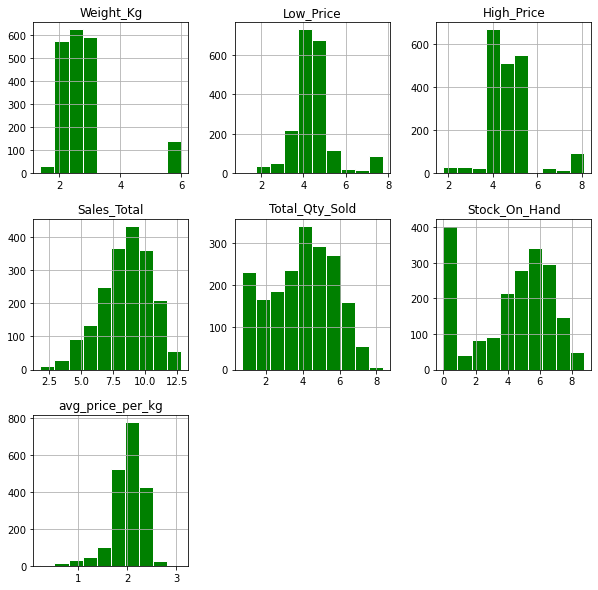

In [16]:
TotalLog = np.log(new_df_train[columns] + 1)
TotalLog.hist(color='green', edgecolor='white', figsize=(10,10))

## Multivariate Analysis

Let us now analyse how our features relate to one another.

At this stage I would like to seperate the Date column into day, month and year so that I can analyse the relationships it has in this dataset.


In [17]:
new_df_train['day'] = new_df_train['Date'].dt.day
new_df_train['month'] = new_df_train['Date'].dt.month
new_df_train['year'] = new_df_train['Date'].dt.year
new_df_train = new_df_train.drop(['Date'], axis = 1)

In [18]:
new_df_train.info()# lets see our columns now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Low_Price         1952 non-null   float64
 6   High_Price        1952 non-null   float64
 7   Sales_Total       1952 non-null   float64
 8   Total_Qty_Sold    1952 non-null   int64  
 9   Total_Kg_Sold     1952 non-null   float64
 10  Stock_On_Hand     1952 non-null   int64  
 11  avg_price_per_kg  1952 non-null   float64
 12  day               1952 non-null   int64  
 13  month             1952 non-null   int64  
 14  year              1952 non-null   int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 244.0+ KB


In [19]:
new_df_train.head()#lests print our new table

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,2020


We will first start by analysing our stocking capabilities which are in the Province and Weight_Kg columns. By looking at the relationship between the province were the produce is grown and the total KG's sold aswell as the avrage price the apples where sold for, we can then see which farmers give us the most sales.

<AxesSubplot:xlabel='Total_Kg_Sold', ylabel='Province'>

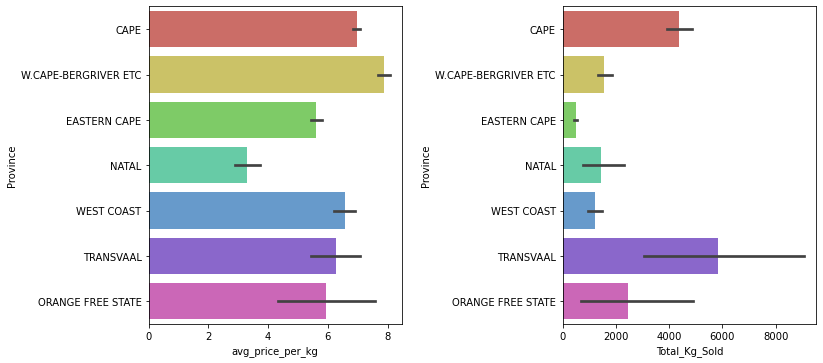

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.tight_layout(w_pad = 13.0)
sns.barplot(x ='avg_price_per_kg' ,y='Province' , data = new_df_train, palette="hls", ax=ax[0])
sns.barplot(x = 'Total_Kg_Sold', y='Province', data = new_df_train, palette="hls", ax=ax[1])


As we can see, the average price per kg for apples grown in W.CAPE-BERGRIVER ETC is higher at about R8 followed by CAPE and WESTCOAST, the lowest average price being for apples grown in NATAL. However most of the apples that we sell are the ones from CAPE follwed by TRANSVAAL and ORANGE FREE STATE. These variables can possibly be used to predict the average price of apples based on where the apples are grown.


It will also be interesting to look at the price and number of apples bought based on the day and month of the sale.

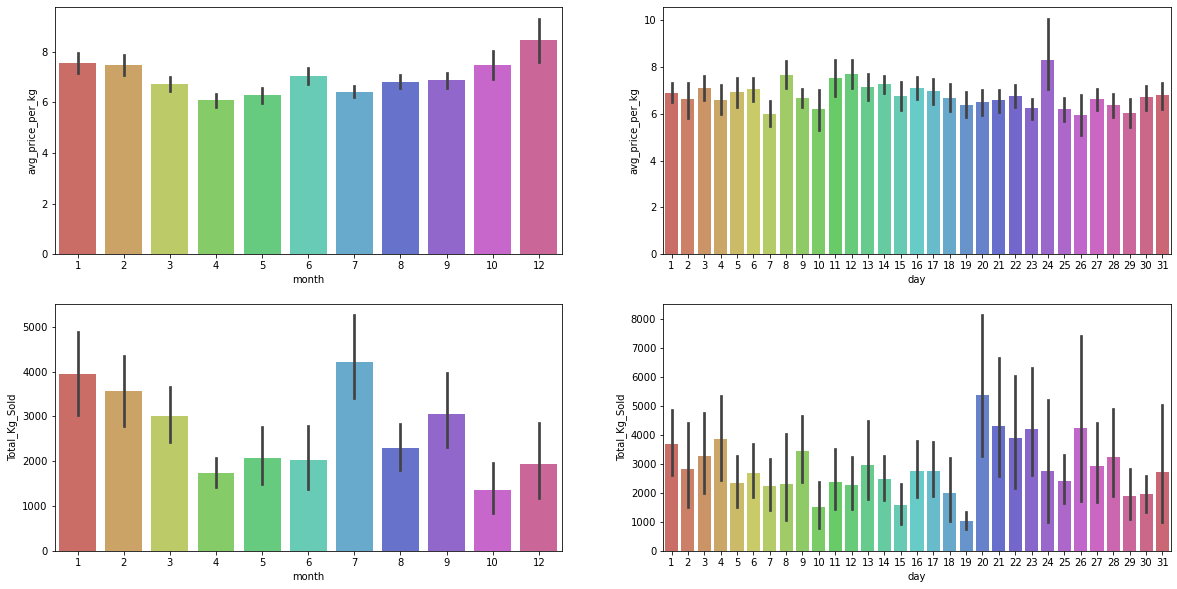

In [21]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.barplot(x = 'month',y= 'Total_Kg_Sold', data = new_df_train, palette="hls", ax=ax[1,0])
sns.barplot(x = 'day',y= 'Total_Kg_Sold', data = new_df_train, palette="hls", ax=ax[1,1])
sns.barplot(x = 'month',y= 'avg_price_per_kg', data = new_df_train, palette="hls", ax=ax[0,0])
sns.barplot(x = 'day',y= 'avg_price_per_kg', data = new_df_train, palette="hls", ax=ax[0,1])

plt.show()

The top two graphs above tell us the relationship between the months and days of the year and the  average price per kg. It tells us that the avg price per kg of apples is higher in December than in other months and higer on certain days of the month.

The bottom two graphs above show us our sales in KG per month and per day. We can see that we've sold more apples in January, May and July then in the other months and our biggest sale quantities happened on the 20th of the month.

These relationships can possibly guide our model to predict the average price based on the day or month of the year.

The total KG sold feature relationship with the month feature can give us a lot of valuable information about the levels of stock the market needs to have in any given month in order to have enough for the demand and also to avoid over supply.

The next step is to look at the correlation that each feature has to the other features.Correlation is used to test the relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. 



In [22]:
new_df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.016251,0.047613,-0.019772
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.015764,0.039084,-0.021276
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.002058,0.047717,-0.018911
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.011699,-0.055853,0.031264
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.020402,-0.058639,0.042132
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,0.003238,-0.023098,0.030462
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,0.081923,-0.011749,-0.045846
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.071334,0.005205,-0.135526
day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.071334,1.000000,0.010012,-0.023257
month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.010012,1.000000,-0.430853


Lets visualize these correlations using a heat map.  The lighter the color of the block, the more positive correlation the feature has to the corresponding feature. Therefore, we see that Weight_Kg, Low_Price, High_Price have a high positive correlation to one another. We also see that they have a good correlation to avg_price_per_kg	as well.


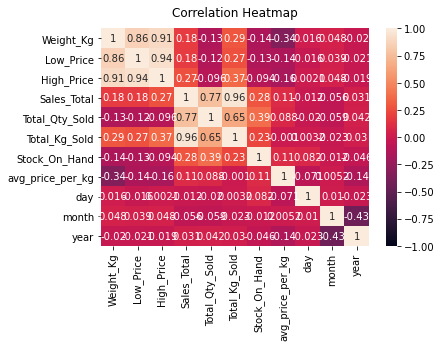

In [23]:
heatmap = sns.heatmap(new_df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Since avg_price_per_kg	is our target variable, it is important to us to see the correlation that each variable has to avg_price_per_kg	 because those variables might help us in our prediction model.

Lets see a visualization that shows us correlations between all our features and our target variable.

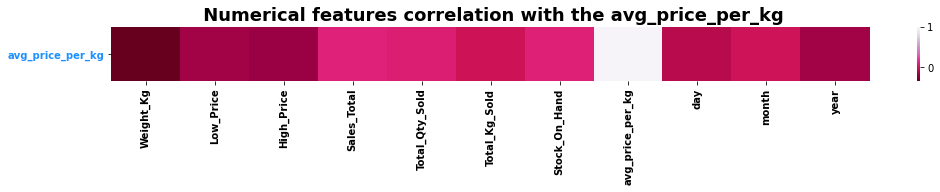

In [24]:
num=new_df_train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['avg_price_per_kg'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the avg_price_per_kg", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

As we can see, Weight KG, Low_price, High_Price all have the highest correlation to our target variable.

## Dummy Variable Encoding

In regression analysis, a dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical feature that may be expected to affect the outcome of the prediction.They can be thought of as numeric stand-ins for qualitative facts in a regression model, sorting data into mutually exclusive categories.
Let us now start encoding our categorical variables particularly Province, Container, Size_Grade.

In [25]:
new_df_train = new_df_train.drop(['Commodities'], axis = 1) #we will now drop the commodities column because 
                                                            #it has the same repeated data.

In [26]:
df_dummies = pd.get_dummies(new_df_train, drop_first=True)

#lets make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace(".","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("-","_") for col in df_dummies.columns]
#lets have a look at our data
df_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,...,0,0,1,0,0,0,0,0,0,0


Lets view the correlations of this table

In [27]:
# We will now move our target variable to be the last column of our table for ease of reference
column_titles = [col for col in df_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies=df_dummies.reindex(columns=column_titles)

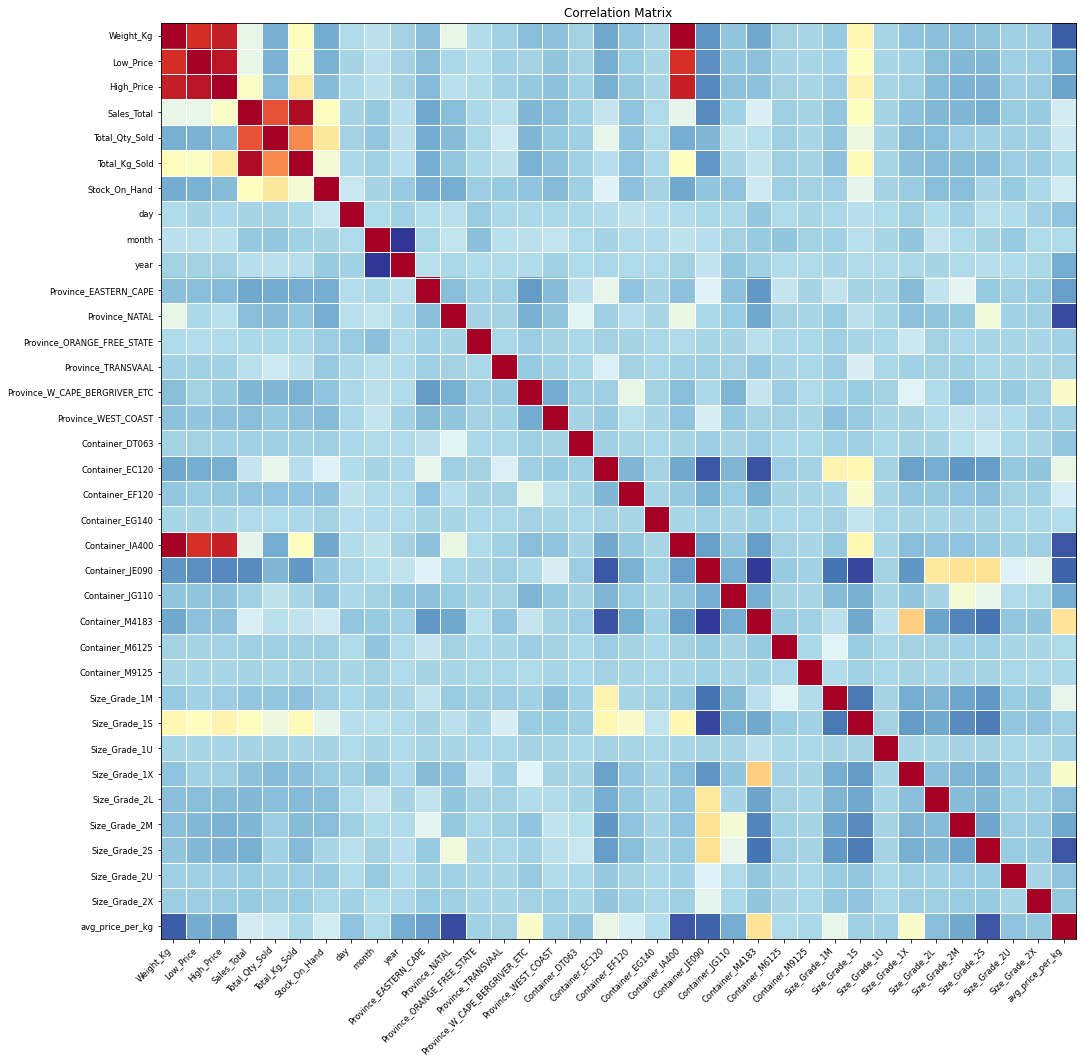

In [28]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

As we can see above our table now has 36 columns instead of 15 due to the dummy variables. It is a good idea to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

We will start by using a filter method - variable selection by variance threshold using sklearn.

# Variable Selection by Variance Thresholds

Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

Variance is very dependent on scale, so it is important for the features to be normalized before implementing variance thresholding. we will use a variance threshold of 3% 

## Prepare the data

In [29]:
#load the necessary packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [30]:
# Seperate our dataset into dependant variable y_data and independant variabes X_data
y_name = 'avg_price_per_kg'
y_data = df_dummies[[y_name]]
X_names = [col for col in df_dummies.columns if col != y_name]
X_data = df_dummies[X_names]
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

Implementing the Variance Threshold.

In [31]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [32]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
col_names =X_new.columns

# View first few entries
X_new.head()

,Weight_Kg,day,month,year,Province_EASTERN_CAPE,Province_NATAL,Province_W_CAPE_BERGRIVER_ETC,Province_WEST_COAST,Container_EC120,Container_EF120,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S
0,0.038539,0.266667,0.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020151,0.433333,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.015113,0.500000,0.272727,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.038539,0.100000,0.363636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.000000,0.900000,0.727273,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


With a threshold of 3% we have gone from 36 to 15 predictors. Variable selection by variance threshold has removed columns who's values do not change therefore will not have a sgnificant effect on the final prediction.

Now we have reached the exciting part of our project - actually building our model and using it to predict prices. In the interest of trying to fiind the best model, we will try different models and compare them using RMSE on the test data we will create through doing a train-test split on our data. Whichever model gives the best RMSE will be our final model. We will start with Linear Regression.

   # Linear Regression

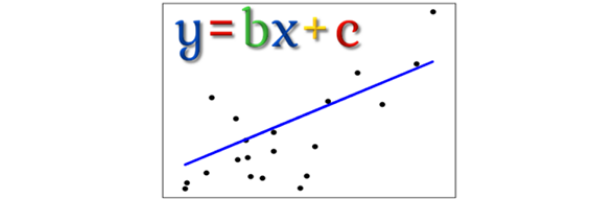

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variables change.

Simple linear regression is used to estimate the relationship between two quantitative variables.

Lets build our model.

In [33]:
#Install the necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Fit data, make predictions, and evaluate model

We will fit, make predictions and evaluate our model within a function. This will assist us in being able to recreate the process for all the models that we will try below.

In the function, We start by calulating the root mean square erroe(RMSE) and the R squared which will both assist us in comparing our models and decidng which model to go with.
We then start splitting our data into training and testing data. As the names suggest, we will use our training data to train our models and use our testing data to test the trained models on, to see the viability of our model. We have to feed our model enough data to be able to learn from it but also save enough data to test wether our model is successful predicting on "unknown data".  For our split, we have decided to go with a 10% split - 90% of our data is for training, 10% of our data is for testing. We decided on this split due to only having 1952 data points to begin with, which we feel is not enough  to have a bigger split e.g 80/20 or 70/30.

We then make predictions and apply the evaluations.



In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [36]:
lm_var = LinearRegression()
y = df_dummies['avg_price_per_kg'] # assign the y value which we will be using for all models

In [37]:
X = df_dummies[col_names].values# assign the x model which we will be using for all models
fit_and_evaluate(lm_var,X,y)#call the function to fit and evaluate the model

{'Train RMSE': 1.5269737479662804,
 'Train R^2': 0.5357328801337724,
 'Test RMSE': 1.5224638028380997,
 'Test R^2': 0.5658756940263654}

   ## Building the Decision Tree Regressor Model

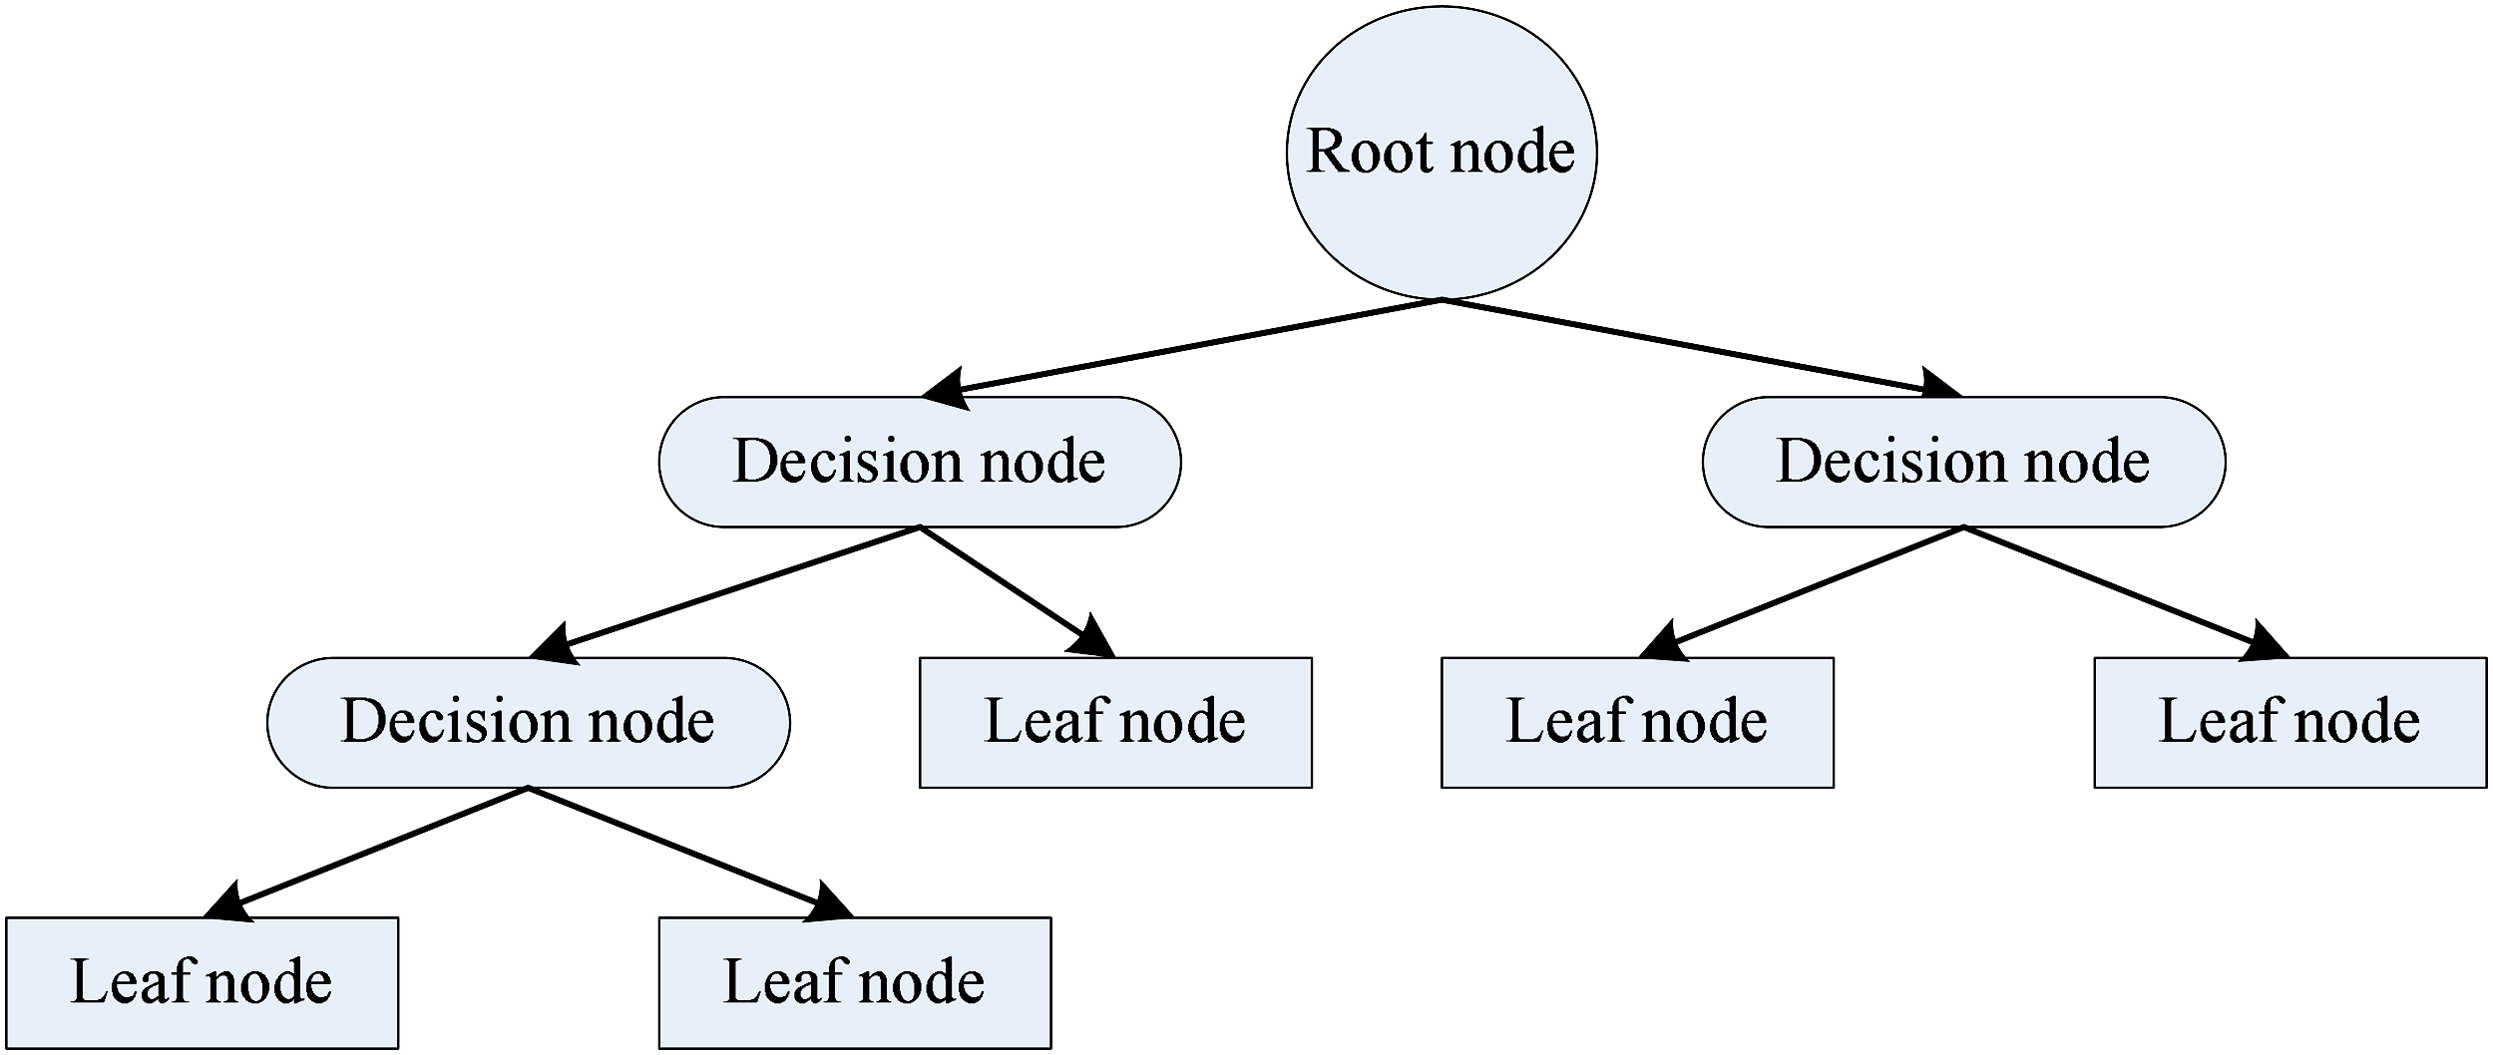

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

Lets see if a decision tree does any better than the Linear Regression.

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dtr=DecisionTreeRegressor() #create an instance of the model

In [40]:
fit_and_evaluate(dtr,X,y)#call the function to fit and evaluate the model

{'Train RMSE': 0.1416797416807833,
 'Train R^2': 0.9960031274610611,
 'Test RMSE': 1.8681362124222274,
 'Test R^2': 0.3463620967380058}

As we can see, the Decision tree model did slightly better in the test data with an RMSE of Test RMSE: 1.0036835219554507.

   ## Building the Random Forest model¶

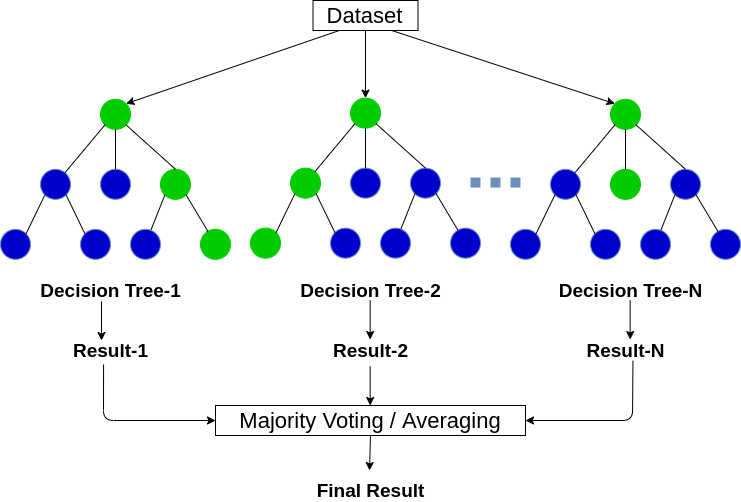

The general idea of the Random Forest model is that a combination of machine learning models increase the overall result. Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction (e.g in the image above).

Lets see what Random Forest has to offer.

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rdr = RandomForestRegressor()#create an instance of the model

In [43]:
fit_and_evaluate(rdr,X,y)#call the function to fit and evaluate the model

{'Train RMSE': 0.4740741482774241,
 'Train R^2': 0.9552495576109352,
 'Test RMSE': 1.2531495911797537,
 'Test R^2': 0.7058790339717531}

As expected, The Random Forest bids better than the Decision tree because it combines multiple decision trees to create an even better model. Its very interesting indeed.

## Building the XGBoost model

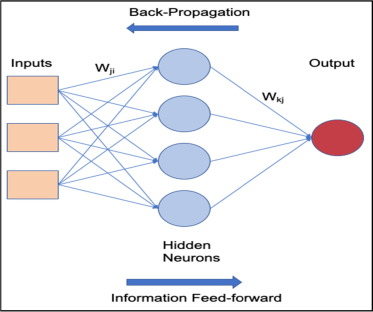

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
The two reasons to use XGBoost are also the two goals of the project:
Execution Speed and Model Performance.
Lets see how well it does on our data.

In [44]:
import xgboost

In [45]:
#create an instance of the model
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [46]:
fit_and_evaluate(xgb,X,y)#call the function to fit and evaluate the model

{'Train RMSE': 0.7022502301826524,
 'Train R^2': 0.9018051826849478,
 'Test RMSE': 1.2927136022113341,
 'Test R^2': 0.6870140896905047}

XGBoost beat all the models so far with a Test RMSE of Test RMSE': 0.6911297404630196. Pretty impressive.

Now lets try lasso and ridge regression models. We are not expecting them to do better than our all time favourites - Random Forest and XGBoost- simply because thats just not how they have been designed. But we will give them a platform none the less.

First up:

   ## Building a lasso regression model

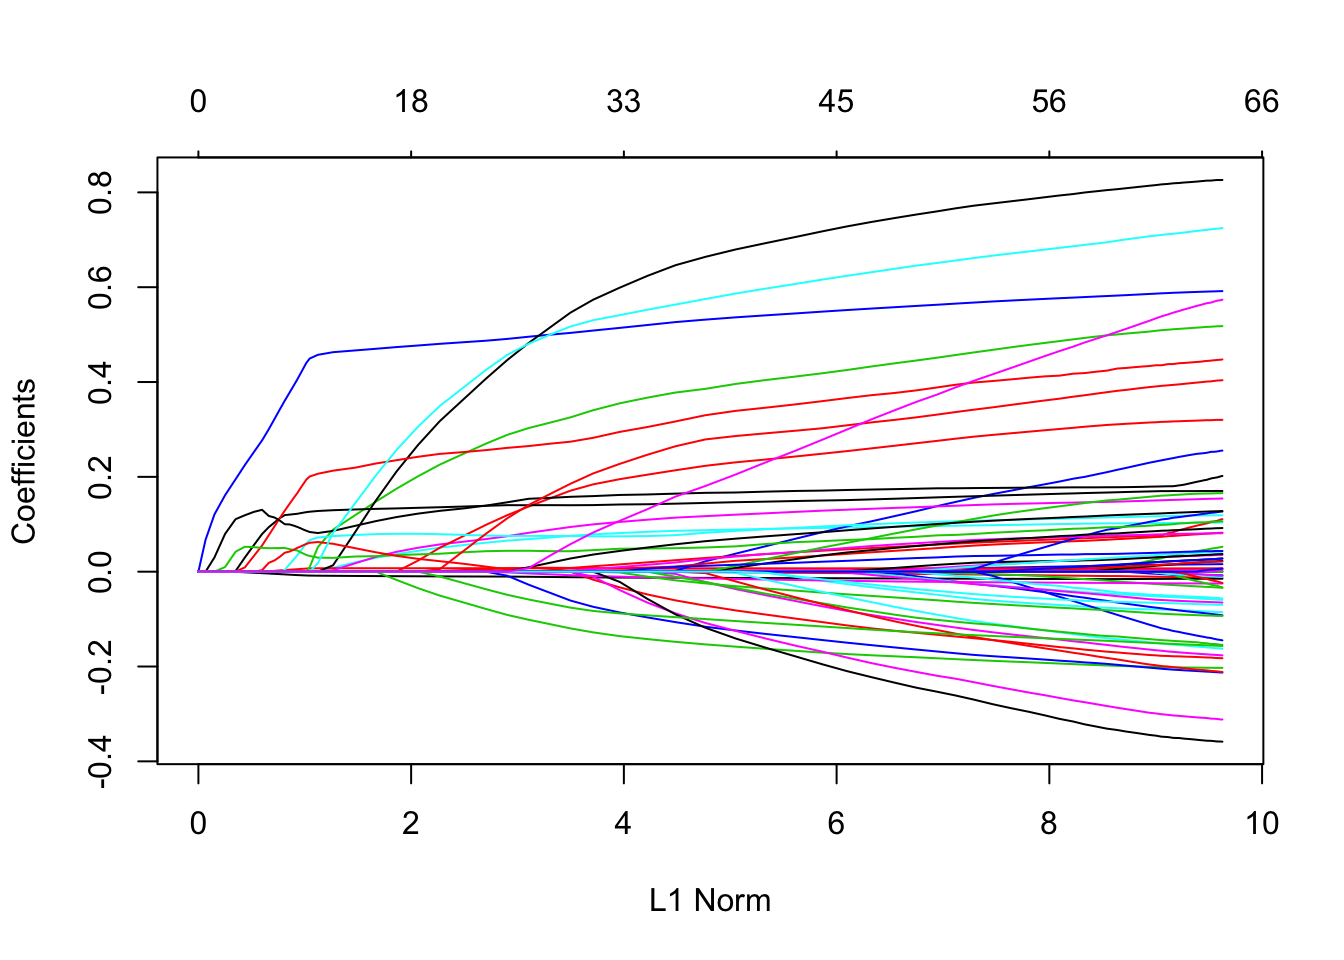

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

We fist start by standardizing our data before we train it in a lasso regression model.
This is the process of standardizing the features around the center and 0 with a standard deviation of 1. This is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In [47]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler
# Import LASSO module
from sklearn.linear_model import Lasso

In [48]:
# Create standardization object
scaler = StandardScaler()

In [49]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X_new)

In [50]:
# #create an instance of the model, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [51]:
fit_and_evaluate(lasso,X_scaled,y)#call the function to fit and evaluate the model

{'Train RMSE': 1.5314542132072773,
 'Train R^2': 0.5330043663379072,
 'Test RMSE': 1.5349256493158137,
 'Test R^2': 0.5587397191908852}

Lasso did not improve our score ( score: 2.40646)

## Building a ridge regression model

Second comes the ridge regression model

In [52]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [53]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X_new.columns)
X_standardise.head()

,Weight_Kg,day,month,year,Province_EASTERN_CAPE,Province_NATAL,Province_W_CAPE_BERGRIVER_ETC,Province_WEST_COAST,Container_EC120,Container_EF120,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S
0,-0.222433,-0.788911,1.262165,0.181119,-0.343488,-0.245547,-0.539449,-0.262685,-0.545777,-0.198503,-0.276891,-0.638243,-0.213372,1.523065,-0.44198,-0.612085,-0.30986,-0.255934,-0.367265,-0.432837
1,-0.295704,-0.214430,-0.598952,0.181119,-0.343488,-0.245547,-0.539449,-0.262685,-0.545777,-0.198503,-0.276891,-0.638243,4.686652,-0.656571,-0.44198,-0.612085,-0.30986,-0.255934,2.722828,-0.432837
2,-0.315779,0.015363,-0.598952,0.181119,-0.343488,-0.245547,1.853743,-0.262685,-0.545777,-0.198503,-0.276891,1.566802,-0.213372,-0.656571,-0.44198,-0.612085,-0.30986,-0.255934,-0.367265,2.310338
3,-0.222433,-1.363392,-0.226728,0.181119,-0.343488,-0.245547,-0.539449,-0.262685,-0.545777,-0.198503,-0.276891,-0.638243,-0.213372,1.523065,-0.44198,1.633760,-0.30986,-0.255934,-0.367265,-0.432837
4,3.608756,1.394117,1.262165,0.181119,2.911310,-0.245547,-0.539449,-0.262685,-0.545777,-0.198503,3.611532,-0.638243,-0.213372,-0.656571,-0.44198,1.633760,-0.30986,-0.255934,-0.367265,-0.432837


In [54]:
# #create an instance of the model
ridge = Ridge()

In [55]:
fit_and_evaluate(ridge,X_standardise,y)#call the function to fit and evaluate the model

{'Train RMSE': 1.5301249735194662,
 'Train R^2': 0.5338146807861032,
 'Test RMSE': 1.5281277281977828,
 'Test R^2': 0.5626395955278081}

As expected, the lasso and the ridge models fell short as compared to the XGBoost, Random Forest even the Linear regression slightly.

<AxesSubplot:xlabel='test RMSE', ylabel='Model'>

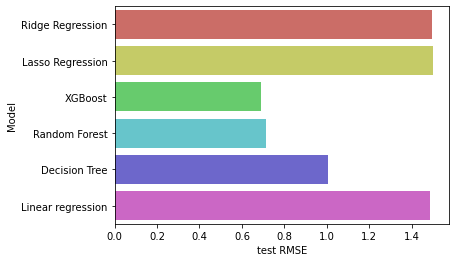

In [56]:
# creating a visual of the test RMSE result comparison
result_dict = {'Ridge Regression' : 1.4949277683692117,
                'Lasso Regression' : 1.5024482644764312,
               'XGBoost': 0.6911297404630196,
               'Random Forest' : 0.7119468540737508,
               'Decision Tree' : 1.0036835219554507,
               'Linear regression' : 1.4877286227636732
              }
result_df =pd.DataFrame(list(result_dict.items()),columns = ['Model','test RMSE'])
sns.barplot(x = 'test RMSE',y= 'Model', data = result_df, palette="hls")

# Conclusion

So our process started with a a dataset of 64 376 data points with 13 columns both numerical and categorical. We sort to explore the data and come up with insights that might help us build a quality regression model. We cleaned and processed our data and finally built models where we assessed the models to decide which model gives us the best chance at predicting the average price per KG of Golden Delicious apples. 
From our analysis and assessment we choose to use the XGBoost model which gave us the best RMSE as well as Rsquared. Random Forest was a close second. The only thing left for us to do is create a submission for kaggle and save our file as a .pkl for the creation of the API. 

## Prepare data for submission

In [57]:
#import and process data as we did with the training data
df_test = pd.read_csv('Advanced_regression_predict-Starter-Data-2629/df-test_set.csv')
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['day'] = df_test['Date'].dt.day
df_test['month'] =df_test['Date'].dt.month
df_test['year'] = df_test['Date'].dt.year

In [58]:
df_test = df_test[df_test.Commodities == 'APPLE GOLDEN DELICIOUS'] # filter for APPLE GOLDEN DELICIOUS
df_test = df_test.drop(['Commodities','Date'], axis = 1)


In [59]:
df_test = pd.get_dummies(df_test)
df_test.columns = [col.replace(" ","_") for col in df_test.columns]
df_test.columns = [col.replace(".","_") for col in df_test.columns]
df_test.columns = [col.replace("-","_") for col in df_test.columns]

df_test = df_test[col_names]

In [60]:
# Assign the predicted prices to predictions
predictions = rdr.predict(df_test)

In [61]:
df_test['Index'] = range(1,686)# add an index as per the instructions on kaggle

In [62]:
submissions = pd.DataFrame({'Index':df_test['Index'], 'avg_price_per_kg': predictions})# create a dataframe with submissions

In [63]:
submissions.head()

,Index,avg_price_per_kg
0,1,10.5214
1,2,10.5217
2,3,9.5833
3,4,7.4095
4,5,7.5722


In [64]:
submissions.to_csv('submissions.csv', index=False)# convert that datafrae into a csv file format for submission

## Lets save our model with pickle

In [65]:
import pickle
#saving model into a pkl file
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lm_var,file)

In [66]:
# loading the .pkl file
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_lm_var = pickle.load(file)